c=clusters: each point is colored based on the cluster it belongs to

cmap='viridis': the color palette used for differentiating clusters

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [36]:
df=pd.read_csv("Mall_Customers.csv")
df['Annual Income (k$)']=df["Annual Income (k$)"].

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


# i had both options Standard or normalized , so i am using normaliez

In [86]:
# X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# # Initialize the scaler
# scaler = StandardScaler()

# # Fit and transform the data
# X_scaled = scaler.fit_transform(X)

In [108]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform the data
X_normalized = scaler.fit_transform(X)

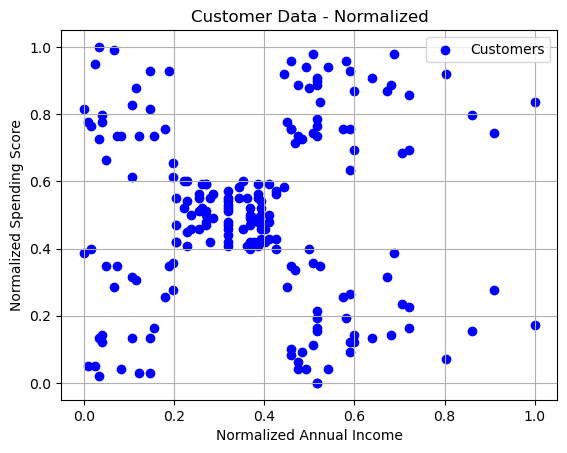

In [143]:
plt.scatter(X_normalized[:, 0], X_normalized[:, 1], c='blue', label='Customers')
plt.xlabel('Normalized Annual Income')
plt.ylabel('Normalized Spending Score')
plt.title('Customer Data - Normalized')
plt.legend()
plt.grid(True)
plt.show()

In [262]:
kmeans = KMeans(n_clusters=3, random_state=12)
clusters = kmeans.fit_predict(X_normalized)
print(kmeans.cluster_centers_[:,:])


[[0.10655738 0.22762951]
 [0.36391032 0.6445078 ]
 [0.59016393 0.17991407]]


C:\Users\haseeb\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


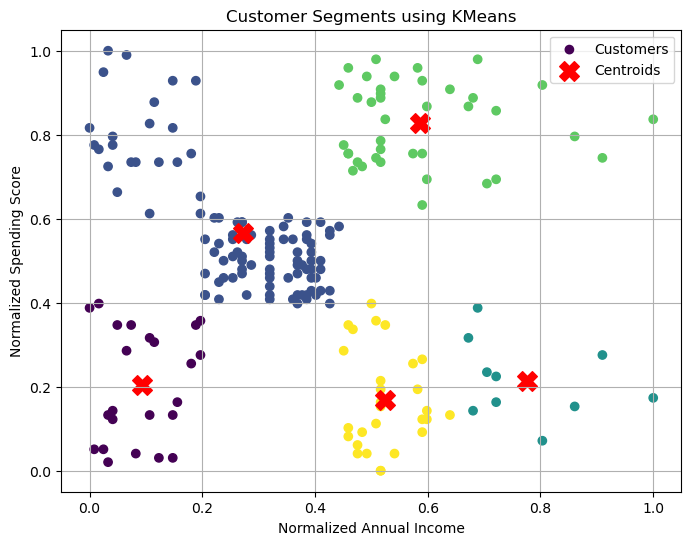

In [260]:
# Plot the clustered data
plt.figure(figsize=(8, 6))
plt.scatter(X_normalized[:, 0], X_normalized[:, 1], c=clusters, cmap='viridis', label='Customers')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=200, c='red', marker='X', label='Centroids')
plt.xlabel('Normalized Annual Income')
plt.ylabel('Normalized Spending Score')
plt.title('Customer Segments using KMeans')
plt.legend()
plt.grid(True)
plt.show()

# Finding optimal value of K  , 
but i have not used silohotte as we have not studied it in class so i avoid it , 

C:\Users\haseeb\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\haseeb\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\haseeb\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\haseeb\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Wi

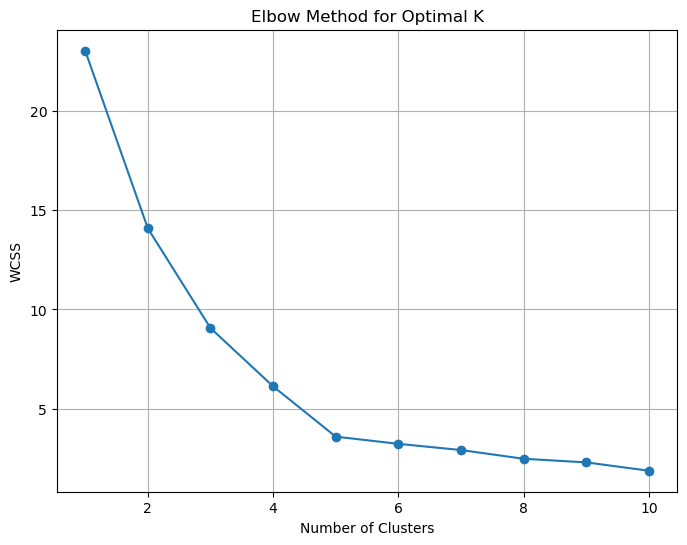

In [268]:
wcss = []  # Within-cluster sum of squares

for i in range(1, 11):
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(X_normalized)
    wcss.append(km.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()
